# Regresión Lineal desde cero

En este notebook voy a implementar una **regresión lineal** desde cero utilizando únicamente Numpy, y luego la voy a comparar con la implementación de scikit-learn.

---

## 1. Introducción
La regresión lineal busca modelar la relación entre una variable dependiente `y` y una o más variables independientes `x` ajustando una línea recta.

Ecuación básica:
\[
y = m * x + b
\]

Donde:  
- `m` = pendiente (slope)  
- `b` = intercepción eje Y (bias)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Carga y exploración de datos
Voy a usar un dataset simple (`Experience Years vs Salary `).

El conjunto de datos fue encontrado en kaggle


In [5]:
df = pd.read_csv('./data/salary_data.csv')
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [6]:
df.describe()

,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


**Pairplot**

Nos permite ver la relaciones entre variables de nuestro conjunto de datos. 

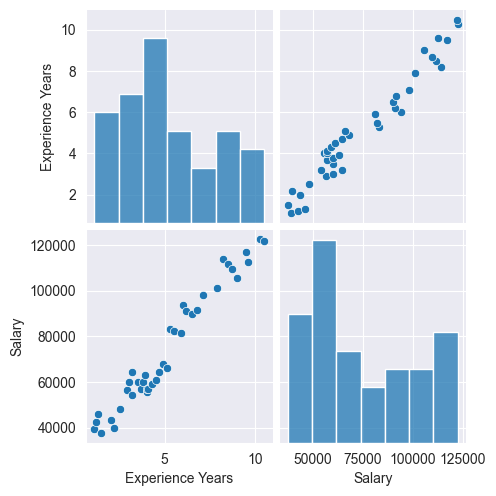

In [17]:
sns.pairplot(df)

**ScatterPlot**

Podemos ver mejor la relación entre las columnas Experience Years y Salary

Text(0.5, 1.0, 'Experience Years vs Salary')

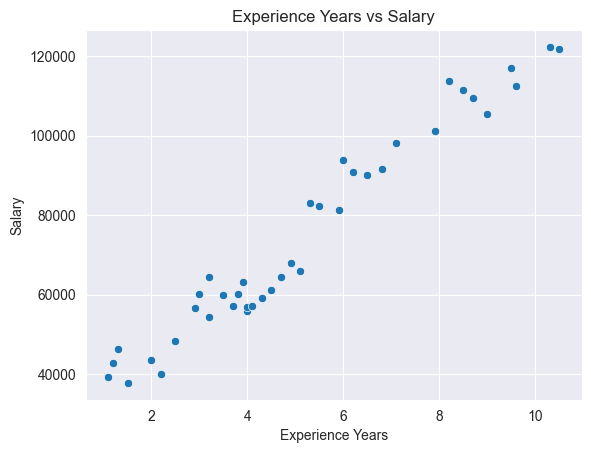

In [16]:
sns.set_style('darkgrid')
sns.scatterplot(df,x='Experience Years',y='Salary')
plt.title('Experience Years vs Salary')

**Análisis**

Se observa una correlación entre las variables, podemos visualizar en el gráfico que a medida que los años de experiencia aumentan, también lo hace el Salario

## 3. Implementación desde cero
Definiremos los componentes básicos:
- Definimos los parámetros
- Definimos la función de Predicción
- Función de pérdida - MSE (mean squared error)
- Gradiente descendente


In [19]:
# Inicialización de parámetros
m = 0
b = 0
learning_rate = 0.01
epochs = 1000

X = df["Experience Years"].values
y = df["Salary"].values

n = len(X)

In [20]:
# Función para predecir
def predict(X, m, b):
    return m*X + b

In [21]:
# Función de pérdida (MSE)
def mse(y, y_pred):
    return np.mean((y - y_pred)**2)

In [22]:
# Gradiente descendente
for epoch in range(epochs):
    y_pred = predict(X, m, b)
    
    # Calcular gradientes
    dm = (-2/n) * np.sum(X * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)
    
    # Actualizar parámetros
    m -= learning_rate * dm
    b -= learning_rate * db
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {mse(y, y_pred):.2f}")

Epoch 0, Loss: 6243031334.48
Epoch 100, Loss: 80358456.67
Epoch 200, Loss: 51842672.56
Epoch 300, Loss: 39147519.38
Epoch 400, Loss: 33495670.08
Epoch 500, Loss: 30979481.42
Epoch 600, Loss: 29859280.75
Epoch 700, Loss: 29360570.31
Epoch 800, Loss: 29138545.72
Epoch 900, Loss: 29039700.94


## 4. Evaluación del modelo

In [23]:
# Predicciones finales
y_pred = predict(X, m, b)

# Métricas
mse_value = mse(y, y_pred)
rmse_value = np.sqrt(mse_value)
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r2_score = 1 - (ss_residual/ss_total)

print("MSE:", mse_value)
print("RMSE:", rmse_value)
print("R²:", r2_score)


MSE: 28995695.50502675
RMSE: 5384.765129977978
R²: 0.9558276507321892


1. **MSE (Mean Squared Error / Error Cuadrático Medio)**  
   - Calcula el promedio de los errores al cuadrado entre los valores reales y los predichos.  
   - Penaliza más los errores grandes.  
   - **Interpretación:** cuanto más bajo sea el MSE, mejor es el ajuste del modelo.  

2. **RMSE (Root Mean Squared Error / Raíz del Error Cuadrático Medio)**  
   - Es la raíz cuadrada del MSE.  
   - Devuelve el error en las **mismas unidades de la variable dependiente (Y)**, lo que lo hace más interpretable.  
   - **Interpretación:** un RMSE bajo indica que el modelo predice con poca desviación respecto a los valores reales.  

3. **R² (Coeficiente de determinación)**  
   - Mide qué proporción de la variabilidad de Y es explicada por el modelo.  
   - Valores posibles:  
     - `R² = 1`: el modelo explica el 100% de la variación.  
     - `R² = 0`: el modelo no explica nada (igual que predecir la media).  
     - `R² < 0`: el modelo es peor que simplemente predecir la media.  
   - **Interpretación:** cuanto más cercano a 1, mejor explica el modelo los datos.  

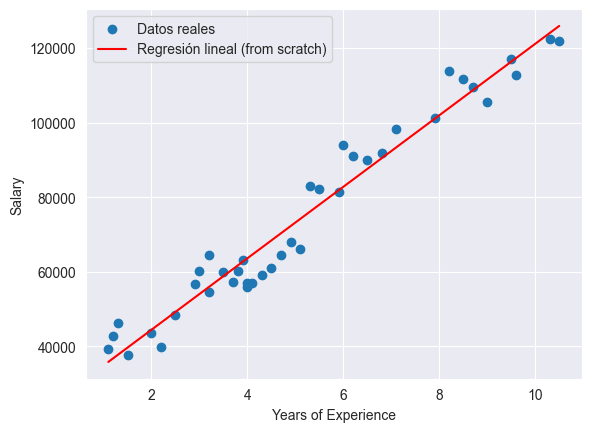

In [24]:
# Visualización de la recta ajustada
plt.scatter(X, y, label="Datos reales")
plt.plot(X, y_pred, color="red", label="Regresión lineal (from scratch)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

## 5. Comparación con scikit-learn


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_reshaped = X.reshape(-1, 1)
model = LinearRegression()
model.fit(X_reshaped, y)

y_pred_sklearn = model.predict(X_reshaped)

print("Coeficiente (m):", model.coef_[0])
print("Intercepto (b):", model.intercept_)
print("MSE sklearn:", mean_squared_error(y, y_pred_sklearn))
print("R² sklearn:", r2_score(y, y_pred_sklearn))


Coeficiente (m): 9523.650507417704
Intercepto (b): 25673.01576053028
MSE sklearn: 28960383.65377621
R² sklearn: 0.9558814451799361


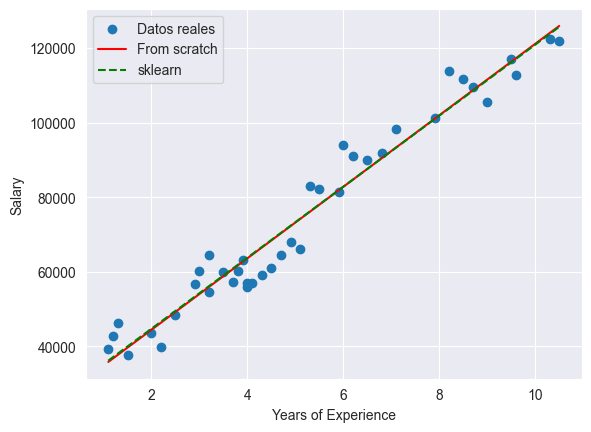

In [26]:
# Visualización comparación
plt.scatter(X, y, label="Datos reales")
plt.plot(X, y_pred, color="red", label="From scratch")
plt.plot(X, y_pred_sklearn, color="green", linestyle="--", label="sklearn")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()
